# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [238]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [239]:
#1
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].isna().sum()

np.int64(0)

Question 1: I chose to clean the Price column by removing commas. The Price variable was actually stored as a string because the numbers over 999 contained commas, which prevented pandas from interpretting the values as numbers. Once I removed commas with .str.replace(), I could convert them into the numeric type. Any value that couldn't be converted is represented by NaN. 

In [240]:
df_2 = pd.read_csv('./data/mn_police_use_of_force.csv', encoding='latin1')
df_2.head(10)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
5,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
6,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Female,20.0,Commission of Crime,1,Downtown West
7,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
8,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Unspecified,1,Downtown West
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West


In [241]:
#2
df_2['subject_injury'].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [242]:
#2 continued
pd.crosstab(df_2['force_type'], df_2['subject_injury'], margins=True, dropna=False)

subject_injury,No,Yes,NaN,All
force_type,,,,
Baton,0,2,2,4
Bodily Force,1093,1286,7051,9430
Chemical Irritant,131,41,1421,1593
Firearm,2,0,0,2
Gun Point Display,33,44,27,104
Improvised Weapon,34,40,74,148
Less Lethal,0,0,87,87
Less Lethal Projectile,1,2,0,3
Maximal Restraint Technique,0,0,170,170


In [243]:
#2 continued
df_2['subject_injury'] = df_2['subject_injury'].fillna('Missing')
df_2.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


Question 2: There doesn't seem to be any apparent patterns regarding missing data.

In [244]:
df_3 = pd.read_csv('./data/metabric.csv', encoding='latin1')
df_3.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [245]:
#3
df_3['Overall Survival Status'] = df_3['Overall Survival Status'].str.replace('0:LIVING', '1', regex=False)
df_3['Overall Survival Status'] = df_3['Overall Survival Status'].str.replace('1:DECEASED', '0', regex=False)
df_3.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [246]:
df_4 = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1')
df_4.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [247]:
df_4['Review Scores Rating'].isna().sum()

np.int64(8323)

In [248]:
#4
median_rating = df_4['Review Scores Rating'].median()
df_4['Review Scores Rating Imputed'] = df_4['Review Scores Rating'].fillna(median_rating)
df_4.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review Scores Rating Imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0


Question 4: This bias might negatively affect my results because missing values are being replaced with the same score. Results may be skewed because this missing data could actually vary, but the imputed medians are all the same.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [249]:
#1
df_5 = pd.read_excel('GSAF5.xlsx')
df_5.head(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8th January,2026.0,Unprovoked,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,Snorkeling,Arlene Lillis,F,56,...,Unknown,Todd Smith: KevinMcMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3rd January,2026.0,Provoked,New Caledonia,Kélé,Between Bourail and Moindou,Scuba Diving,Unknown,M,?,...,Unknown,Andy Currie: Province Sud:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21st December,2016.0,Unprovoked,Australia,Western Australia,Ocean Reef North Perth,SCUBA Diving,Tanveer Dhillon,M,?,...,Great White Shark,7 News: Facebook: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21st December,2025.0,Unprovoked,USA,California,Lovers Point Pacific Grove,Swimming,Erica Fox,F,55,...,Great White Shark,Kevin McMurray Tracking sharks.com: Ralph Coll...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12th December,2025.0,Unprovoked,USA,Sonoma County California,Salmon Creek,Surfing,Unknown,M,?,...,Suspected Great White Shark,Kevin McMurray Tracking sharks.com:Andrew Curr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
#2
df_column_drop = df_5.dropna(axis=1, how='any')
df_column_drop.head()

,Date
0,20th January
1,19th January
2,19th January
3,18th January
4,10th January


Question 3: An observation is represented by the rows of a dataset. In this case, an observation is a recorded shark attack entry. Observations affect our choices in cleaning data because we need to be careful with what we're removing; we could risk losing data if we drop an observation/row. Each observation deleted could skew statistical results such as mean and median.

In [251]:
#4
df_5['Year'] = df_5['Year'].replace(0, np.nan)
df_5['Year'] = df_5['Year'].astype('Int64')
df_5.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
df_5['Year'].describe()

count         6939.0
mean     1971.943796
std        60.676742
min              5.0
25%           1951.0
50%           1988.0
75%           2010.0
max           2026.0
Name: Year, dtype: Float64

In [253]:
df_recent = df_5[df_5['Year'] >= 1940]

In [254]:
attacks_per_year = df_recent['Year'].value_counts().sort_index()
print(attacks_per_year.to_string())

Year
1940     24
1941     27
1942     41
1943     28
1944     31
1945     16
1946     26
1947     30
1948     29
1949     31
1950     43
1951     32
1952     29
1953     36
1954     45
1955     43
1956     51
1957     41
1958     54
1959     93
1960     93
1961     78
1962     86
1963     61
1964     66
1965     51
1966     58
1967     48
1968     47
1969     30
1970     42
1971     30
1972     36
1973     27
1974     39
1975     49
1976     39
1977     26
1978     26
1979     25
1980     36
1981     49
1982     42
1983     50
1984     41
1985     37
1986     39
1987     35
1988     56
1989     53
1990     39
1991     39
1992     56
1993     56
1994     57
1995     76
1996     61
1997     57
1998     65
1999     66
2000     97
2001     92
2002     88
2003     92
2004     92
2005    103
2006    103
2007    113
2008    122
2009    120
2010    101
2011    128
2012    117
2013    122
2014    126
2015    143
2016    134
2017    141
2018    124
2019    114
2020    101
2021    111
2022     98

Question 4: After cleaning the year variable, I saw that the minimum value is 5 and maximum value is 2026. I removed any years that were 0000 in the data and replaced them with NaN. After filtering year to focus on attacks since 1940, I noticed that shark attacks increased, especially in the 2000s, until the early 2020s where numbers dropped a little bit.

In [255]:
#5
df_5['Age'] = df_5['Age'].astype(str)
df_5['Age'] = df_5['Age'].replace('?', np.nan)
df_5['Age'] = pd.to_numeric(df_5['Age'], errors='coerce')
df_5.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39.0,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11.0,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27.0,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12.0,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,NaN,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


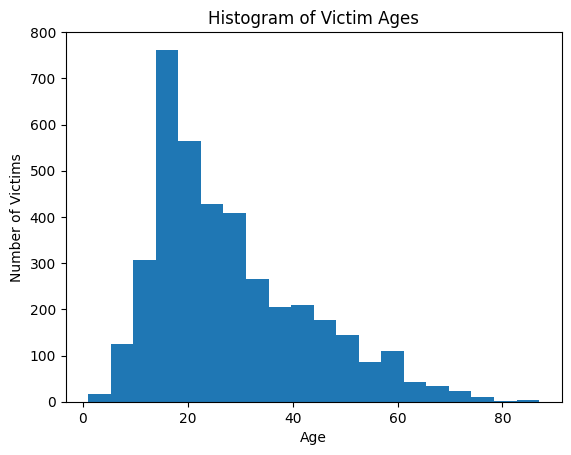

In [256]:
#5
import matplotlib.pyplot as plt

ages = df_5['Age'].dropna()

plt.hist(ages, bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.title('Histogram of Victim Ages')
plt.show()

In [257]:
df_5['Type'].value_counts(dropna=False)

Type
Unprovoked             5221
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
NaN                      18
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [258]:
#6
df_5['Type'] = df_5['Type'].astype(str)
df_5['Type'] = df_5['Type'].str.strip()
df_5['Type'] = df_5['Type'].str.capitalize()
df_5.loc[~df_5['Type'].isin(['Provoked', 'Unprovoked']), 'Type'] = 'Unknown'

df_5['Type'].value_counts(dropna=False)

Type
Unprovoked    5222
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [259]:
df_5['Fatal Y/N'].value_counts(dropna=False)

Fatal Y/N
N          4930
Y          1487
NaN         561
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [260]:
#7
df_5['Fatal Y/N'] = df_5['Fatal Y/N'].astype(str)
df_5['Fatal Y/N'] = df_5['Fatal Y/N'].str.strip()
df_5['Fatal Y/N'] = df_5['Fatal Y/N'].str.capitalize()
df_5.loc[~df_5['Fatal Y/N'].isin(['Y', 'N']), 'Fatal Y/N'] = 'Unknown'

df_5['Fatal Y/N'].value_counts(dropna=False)

Fatal Y/N
N          4939
Y          1488
Unknown     643
Name: count, dtype: int64

In [261]:
#8
pd.crosstab(df_5['Type'], df_5['Fatal Y/N'], margins=True, dropna=False)

Fatal Y/N,N,Unknown,Y,All
Type,,,,
Provoked,614,9,21,644
Unknown,449,555,200,1204
Unprovoked,3876,79,1267,5222
All,4939,643,1488,7070


Question 8: When an attack is unprovoked, the data suggests how it's more likely to not be fatal. Though provoked attacks were recorded by a smaller amount of data, they're also more likely to not be fatal. However, there are uncertainties regarding unknown attack types and unknown fatal values.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about data tidying, which is an important component of data cleaning.
2. The tidy data standard intends to accomplish organizing data values easier, assisting with the initial exploration of the data while simplifying data analysis tools (so you don't need to use translation).
3. When Wickham calls messy datasets messy, I thought she was describing how datasets have unique features that need specific cleaning because they aren't standardized (unless they're in tidy form); this is similar to how families have problems unique to them. The second sentence refers to how it's easy to distinguish observations and variables in a specific dataset, but it's hard to define variables and observations in a standard way because different datasets and scenarios might suggest different meanings.
4. Wickham defines values as being different entries attached to variable; for example: a number attached to a height variable is the value --> height = __. Variables are described as being separate components but having functional relationships between each other; for example, density is the ratio of weight to volume (weight and volume being variables). Observations are described as singular collections of data containing different variables; for example, demographic data collected from each person is age, sex, and race.
5. Tidy data is defined as being "a standard way of mapping the meaning of a dataset to its structure," according to Wickham.
6. The 5 most common problems with messy datasets are listed below. The data in Table 4 is considered messy because it needs to be melted, which is the process of turning columns into rows.
* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.
* A single observational unit is stored in multiple tables.
7. Table 11 is messy because year, month, and days are all stored as individual columns. However, in Table 12, year, month, and days are melted into rows, making the table molten. 
  

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [262]:
#1
df_6 = pd.read_csv('./data/ForeignGifts_edu.csv', encoding='latin1')
df_6.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


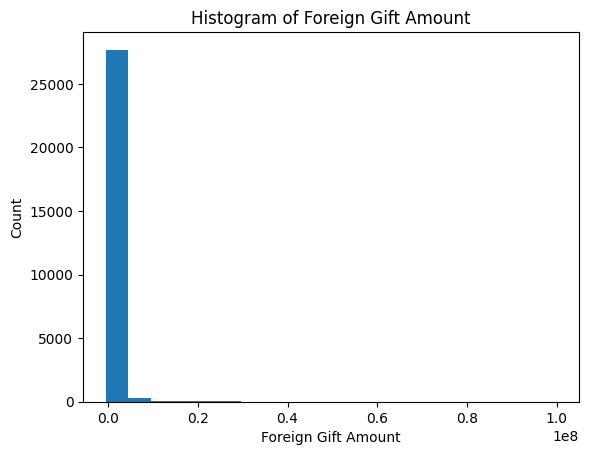

In [263]:
#2
import matplotlib.pyplot as plt

amount = pd.to_numeric(df_6['Foreign Gift Amount'], errors='coerce').dropna()

plt.hist(amount, bins= 20)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Count')
plt.title('Histogram of Foreign Gift Amount')
plt.show()

In [264]:
df_6['Foreign Gift Amount'].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

Question 2: The above histogram plots the variable "Foreign Gift Amount." The histogram illustrates how most gift amounts are very small in comparison to very large ones. At first, I thought the histogram was inaccurate; however, I figured out that most observations are recorded as very small values, making the histogram skewed. This reflects how the data itself is skewed. 

In [265]:
#3
df_6['Gift Type'].value_counts(normalize=True)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

Question 3: Contract has the highest proportion at 0.6121. Monetary gift is second at 0.3875. Real estate trails very far behind at last with 0.0004. 

In [266]:
#4
df_6.groupby('Country of Giftor').count()['Foreign Gift Amount'].sort_values(ascending=False).head(15)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

In [267]:
#4 continued
df_6.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [268]:
#5
df_6.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

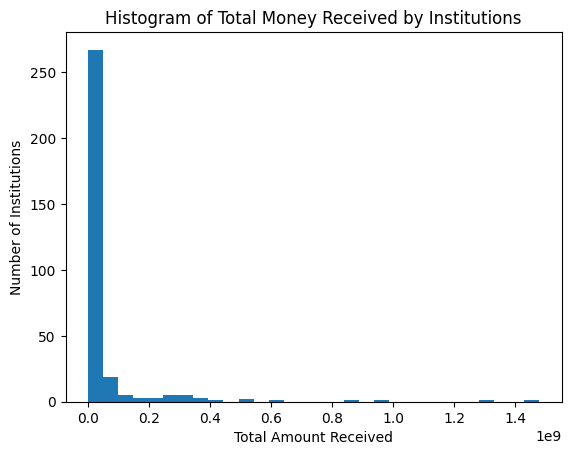

In [269]:
#5 continued
amount_1 = df_6.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.hist(amount_1, bins= 30)
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Histogram of Total Money Received by Institutions')
plt.show()

In [270]:
#6
df_6.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
                                          ...    
Jeong, Yeoncheol                                1
Francois, Pierre                                1
Park, Kwanhong                                  1
Wu, Jinyan                                      1
Zhang, Stephanie                                1
Name: Foreign Gift Amount, Length: 8993, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [271]:
#1
df_7 = pd.read_csv('./data/college_completion.csv', encoding='latin1')

In [272]:
#2
df_7.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [273]:
#2 continued
df_7.shape

(3798, 63)

Question 2: There are 3798 observations and 63 variables.

In [274]:
#3
pd.crosstab(df_7['control'], df_7['level'], margins=True, dropna=False)

level,2-year,4-year,All
control,,,
Private for-profit,465,527,992
Private not-for-profit,68,1180,1248
Public,926,632,1558
All,1459,2339,3798


Question 3: There are very little private not-for-profit 2-year institutions. Majority of private not-for-profit institutions are 4-year. Private for-profit institutions are pretty evenly split between 2-year and 4-year. Public institutions are a little less evenly split in terms of being 2-year or 4-year, but it's not as imbalanced as private not-for-profit. There are more public institutions that are 2-year than 4.

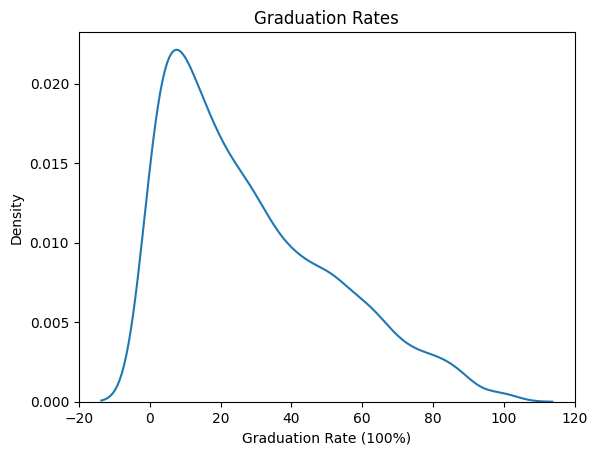

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [275]:
#4
import seaborn as sns

sns.kdeplot(df_7['grad_100_value'])

plt.xlabel("Graduation Rate (100%)")
plt.title("Graduation Rates")
plt.show()

df_7['grad_100_value'].describe()

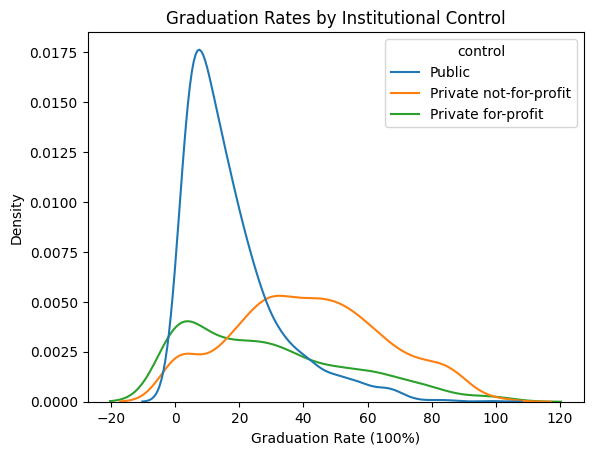

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [276]:
#4 continued

sns.kdeplot(df_7, x = 'grad_100_value', hue = 'control')

plt.xlabel("Graduation Rate (100%)")
plt.title("Graduation Rates by Institutional Control")
plt.show()

df_7.groupby('control')['grad_100_value'].describe()

Question 4: Based on the KDE plot and describe table, private not-for-profit institutions seem to have the most favorable graduation rates.

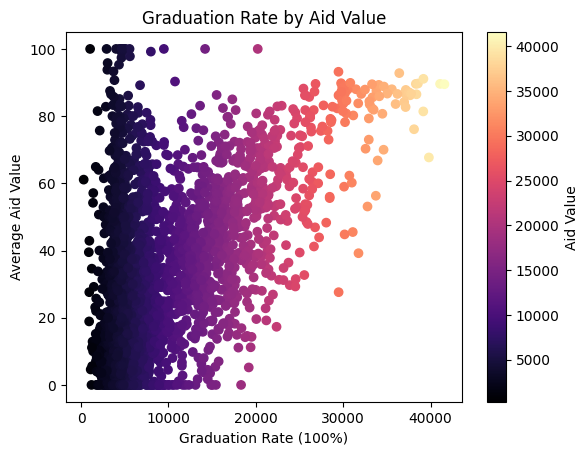

In [277]:
#5
plt.scatter(df_7['aid_value'], df_7['grad_100_value'], c=df_7['aid_value'], cmap='magma')
plt.colorbar(label='Aid Value')

plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Average Aid Value")
plt.title("Graduation Rate by Aid Value")
plt.show()

Question 5: I see that higher aid values correlate with higher graduation rates.

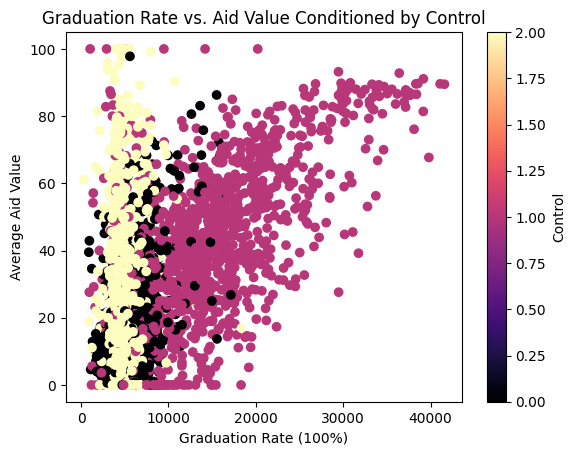

In [278]:
#5 continued
colors = df_7['control'].map(control_map)

plt.scatter(df_7['aid_value'], df_7['grad_100_value'], c=colors, cmap='magma')
plt.colorbar(label='Control')

plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Average Aid Value")
plt.title("Graduation Rate vs. Aid Value Conditioned by Control")
plt.show()

Question 5 continued: An important thing to note in my code is that control types are represented by values of 0, 1, and 2. 0 is public, 1 is private not-for-profit, and 2 is private for-profit. Based on the graph, private not-for-profit institutions seemingly provide aid that varies positively with graduation rates.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [279]:
#1
df_8 = pd.read_csv('./data/ames_prices.csv', encoding='latin1')
df_8.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


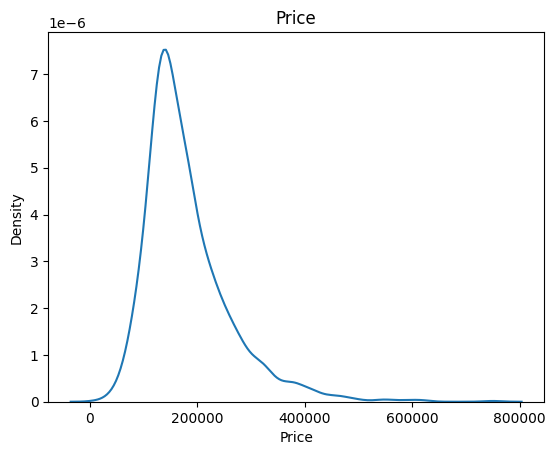

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [280]:
#2
sns.kdeplot(df_8['price'])

plt.xlabel("Price")
plt.title("Price")
plt.show()

df_8['price'].describe()

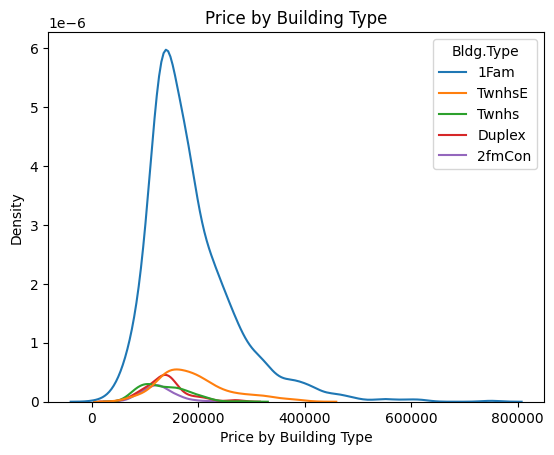

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [281]:
#2
sns.kdeplot(df_8, x = 'price', hue = 'Bldg.Type')

plt.xlabel("Price by Building Type")
plt.title("Price by Building Type")
plt.show()

df_8.groupby('Bldg.Type')['price'].describe()

Question 2: End-of-unit townhome is the most expensive on average, with single family home being second, and duplex being third. Single family homes have the most variance based on the KDE graph and describe table, specifically the standard deviation column.

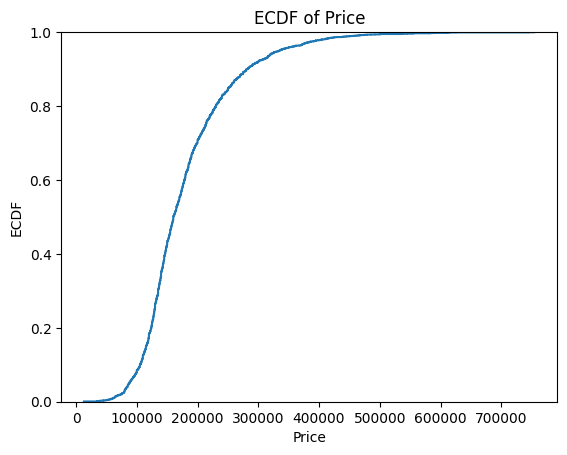

{'min': np.int64(12789), '25%': np.float64(129500.0), 'median': np.float64(160000.0), '75%': np.float64(213500.0), 'max': np.int64(755000)}


In [282]:
#3
sns.ecdfplot(df_8['price'])

plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('ECDF of Price')
plt.show()

five_num_summary = {
    'min': df_8['price'].min(),
    '25%': df_8['price'].quantile(0.25),
    'median': df_8['price'].median(),
    '75%': df_8['price'].quantile(0.75),
    'max': df_8['price'].max()
}

print(five_num_summary)

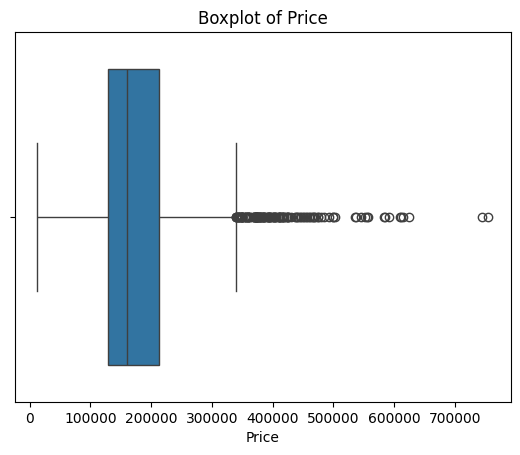

In [283]:
#4
sns.boxplot(x=df_8['price'])

plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.show()

Question 4: There seem to be outliers outside of the upper whisker.

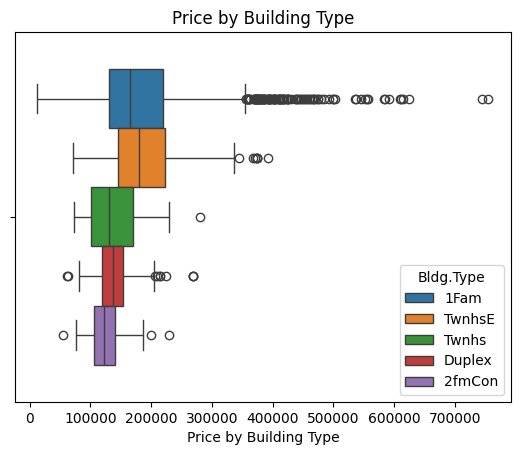

In [284]:
#4 continued
sns.boxplot(df_8, x = 'price', hue = 'Bldg.Type')

plt.xlabel('Price by Building Type')
plt.title('Price by Building Type')
plt.show()

Question 4: I noticed that single family homes have the most variance and the most outliers. This means that single family homes can have very extreme prices that deviate from the average even when the prices are similar to each other. On the flipside, two-family conversion homes have the lowest variance and very little outliers. The prices of two-family conversion homes are clustered closer together and less spread out, so there are less points that cross the threshold to be considered outliers.

In [285]:
#5
Q1 = df_8['price'].quantile(0.25)
Q3 = df_8['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_8['price_outlier'] = (
    (df_8['price'] < lower_bound) | 
    (df_8['price'] > upper_bound)
).astype(int)

df_8['price_outlier'].value_counts()

price_outlier
0    2793
1     137
Name: count, dtype: int64

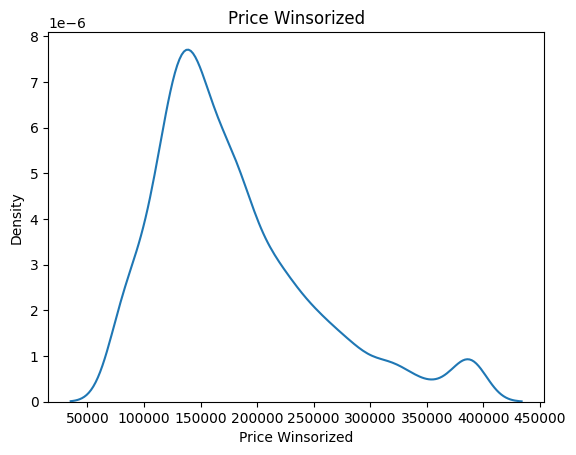

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count      2930.000000
mean     179329.994198
std       71952.575588
min       79000.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      390000.000000
Name: price_winsorized, dtype: float64

In [286]:
#6
from scipy.stats.mstats import winsorize

df_8['price_winsorized'] = winsorize(df_8['price'], limits=[0.025, 0.025])
sns.kdeplot(df_8['price_winsorized'])

plt.xlabel("Price Winsorized")
plt.title("Price Winsorized")
plt.show()

df_8['price_winsorized'].describe()

Question 6: When comparing the results of the winsorized price to just price, I noticed that the values of min and max changed drastically. In the winsorized version of data, the min value increased, while the max value decreased. Since winsorizing data caps extreme values, it makes sense why the max and min changed. Additionally, mean and std changed slightly which could be attributed to capping extreme values.